# __Week 2__: Neural Networks
***

### Biological Motivation
- The basic computational unit of the brain is a __neuron__, and they are connected by __synapses__. Each neuron recieves input signals from its __dendrites__ and produces output signals along its __axon__.

<img src="../figures/neuron.png" alt="Neuron ex" title="Bio Motivation" width="500"/>

- Neural networks with at least one hidden layer are <i>universal approximators</i>. This simply means that given any continuous function $f(x)$ and some $\epsilon > 0$, there exists a Neural Network $g(x)$ with one hidden layer such that $\forall, |f(x) - g(x)| < \epsilon$. In other words, __the Neural Network can approximate any continuous function__.

- Neural Networks work well in practice because they compactly express nice, smooth functions that fit well with the statistical properties of data we encounter in practice.

- Larger Neural Networks can represent more complicated functions.

<img src="../figures/layers.jpg" alt="Complicated" title="Hidden neurons" width="500"/>



### Data Preprocessing
- *Previous lecture
- Dimension Reduction
    - Principal Component Analysis
- Normalization - normalizing the data dimensions so that they are of approximately the same scale

### Neural Network Architectures
- Fully- vs. Partially- Connected layers
    - Fully - neurons between two adjacent layers are fully pairwise connected, but neurons within a single layer share no connections
- Naming Conventions:
    - N-layer NN -- we don't count the input layer
        - Also called ANNs (Artificial Neural Networks) or MLPs (Multilayer Perceptrons)
- Output layer - output layer neurons most commonly do not have an activation function
    - Usually taken to represent class scores or real-valued target
- The forward pass of a fully-connected layer corresponds to one matrix multiplication followed by a bias offset and an activation function.

<img src="../figures/nn.jpg" alt="NN" title="neurons" width="250"/>
<img src="../figures/nn2.jpg" alt="NN" title="neurons" width="250"/>


#### Activation Functions - takes a single number and performs a certain fixed mathematical operation on it. 
- Sigmoid, Tanh, ReLU, Leaky ReLU, Maxout, etc.
- Are placed <i>between</i> layers.


#### Other relevant vocab
- Overfitting - occurs when a model with high capacity fits the <i>noise</i> in the data instead of the assumed underlying relationship
- Epoch - number of passes of entire training dataset through ML algorithm 


### Loss Functions
- Data loss - measures quality of a particular set of parameters based on how well induced scores agree with ground truth labels
- Mean squared error, Hinge loss, Cross Entropy Loss, etc.
- Should decrease as epochs advance

### Learning Process/Parameter Updates
- Optimization - process of finding the set of parameters $W$ that minimize the loss function
    - Want to advance in direction that improves parameters (this is mathematically guaranteed to be the direction of steepest descent), which is related to the __gradient__ of the loss function

## Motivating Example

In [6]:
import numpy as np
import pandas as pd
import sys
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

### Poe

In [7]:
file = open("../poe_allen.txt").read()

In [8]:
a = file.split('\n')

In [9]:
for item in a:
    if len(item) <= 5:
        a.remove(item)
    else:
        continue

In [10]:
f_clean = []

for episode in a:
    f_clean.append(re.sub(r'[^\w]', ' ', episode))

In [11]:
texts = f_clean.copy()

### Shakespeare

In [14]:
file2 = open("../shakespeare.txt").read()

In [18]:
a2 = file2.split('\n')

In [20]:
for item in a2:
    if len(item) <= 5:
        a2.remove(item)
    else:
        continue

In [22]:
f_clean2 = []

for episode in a2:
    f_clean2.append(re.sub(r'[^\w]', ' ', episode))

In [24]:
texts2 = f_clean2.copy()

### Creating Sentence Embeddings using BERT

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')


[[-0.39310005  0.03886304  1.9874251  ... -0.6093677  -1.094621
   0.3264901 ]
 [ 0.06153379  0.32736215  1.8332328  ... -0.12985346  0.46089378
   0.24035406]]


In [30]:
embeddings = model.encode(texts)

In [13]:
embeddings.shape

(8919, 768)

In [28]:
embeddings2 = model.encode(texts2)

In [31]:
embeddings2.shape

(2236, 768)

##### Visualizing Embeddings

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
N=250

In [76]:
number_of_rows = embeddings.shape[0]
random_indices = np.random.choice(number_of_rows, size=N, replace=False)
random_rows = embeddings[random_indices, :]

In [77]:
X_embedded = TSNE(n_components=2,random_state=0).fit_transform(random_rows)

In [78]:
number_of_rows2 = embeddings2.shape[0]
random_indices2 = np.random.choice(number_of_rows2, size=N, replace=False)
random_rows2 = embeddings2[random_indices2, :]

In [79]:
X_embedded2 = TSNE(n_components=2,random_state=0).fit_transform(random_rows2)

In [80]:
df_subset = pd.DataFrame()

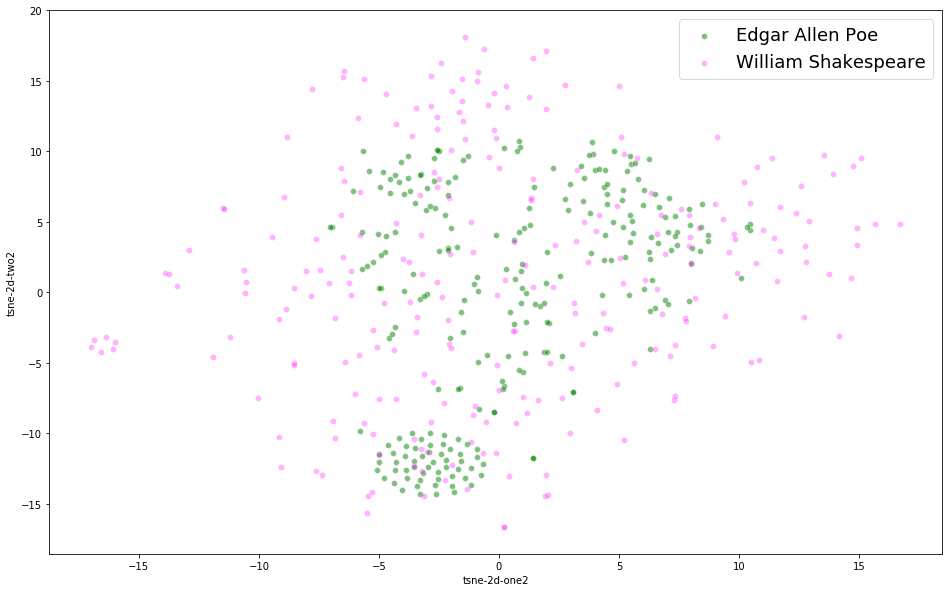

In [88]:
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=df_subset,
    color="green",
    legend="full",
    alpha=0.5
)

df_subset['tsne-2d-one2'] = X_embedded2[:,0]
df_subset['tsne-2d-two2'] = X_embedded2[:,1]
sns.scatterplot(
    x="tsne-2d-one2", y="tsne-2d-two2",
    data=df_subset,
    color="magenta",
    legend="full",
    alpha=0.3
)

plt.legend(['Edgar Allen Poe', 'William Shakespeare'], fontsize=18)
plt.show()


## Sources
[1] http://web.stanford.edu/class/cs224n/index.html#schedule <br>
[2] https://cs231n.github.io <br>
[3] https://www.kaggle.com/mruanova/shakespeare <br>
[4] https://www.kaggle.com/tiaschmidt/edgar-allan-poes-complete-work <br>
[5] https://huggingface.co/sentence-transformers/bert-base-nli-mean-tokens <br>
[6] https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b <br>